In [1]:
import numpy as np
import wormholes as wh
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import colorcet as cc

In [2]:
# Suppress warnings
# (Many overflows/underflows otherwise, since exp(u,v,φ) appear throughout)
import warnings
warnings.filterwarnings('ignore')

In [7]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{amssymb} \\usepackage{amsmath}'

## Massive type IIA on $S^3\times S^3$

A shooting method is used to solve the equations of motion, which take the form (see Mathematica notebook)

$$ \begin{align*}
    f' &= F_f \,, & \qquad u' &\equiv u_d \,, & \qquad \phi' &\equiv \phi_d \,, & \qquad h' &= \frac{f}{q^3} \,,\\
    & & u_d' &= F_u \,, & \phi_d' &= F_\phi \,,
\end{align*} $$

with initial conditions at $r=0$,

$$ u_d(0) = \phi_d(0) = h(0) = 0 \,,\qquad f(0)=f_0 \,,\quad u(0)=u_0 \,,\quad \phi(0)=\phi_0 \,, $$

chosen in such a way that the correct AdS boundary conditions are met for $r\to\infty$. For the solution to be smooth at $r=0$ the parameters need to be related through

$$ \begin{align*}
    f_0^{-2} &= 2 - \frac{q_0^2}{2} V(u_0, \phi_0) \,,\\
    \mathfrak{q}^2 &= 4e^{-3u_0+\phi_0/2} q_0^4 (1 + f_0^{-2}) \,.
\end{align*} $$

(Note that we require $f_0^{-2}>0$.) For each fixed $q_0$ there is a unique choice for $(u_0,\phi_0)$ which leads to a regular AdS wormhole solution.

### Shooting method: example profiles and parameter space

Picking $(u_0,\phi_0)$ by hand typically results in singular solutions.

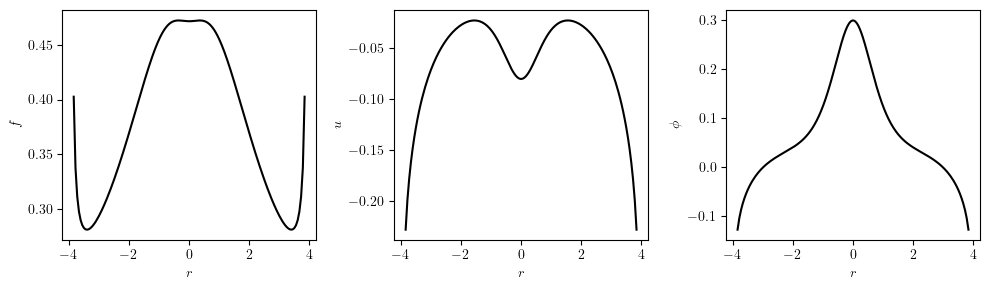

In [5]:
q0, rmax = 1, 5
u0, φ0 = -0.08, 0.3

soln = wh.solve_S3S3(q0, u0, φ0, rmax)
r, f, u, ud, φ, φd, h, charge = wh.symmetrize_S3S3(soln)

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for ax, y, label in zip(axes, [f, u, φ], ['$f$', '$u$', '$\phi$']):
    ax.plot(r, y, 'k')
    ax.set_xlabel('$r$')
    ax.set_ylabel(label)

plt.tight_layout()
plt.show()

Optimal values for $(u_0,\phi_0)$ to match the AdS boundary conditions ($f\sim\frac{1}{r}$ and $u,\phi\to0$ for $r\to\infty$) are found using a shooting method.

In [13]:
q0, rmax = 1, 20

soln, value = wh.wormhole_S3S3(q0, rmax, display_summary=True)
r, f, u, ud, φ, φd, h, charge = soln

S3xS3: (q0, rmax) = (1.000000, 20.000000)...
       success : True
        f_eval : 158
            u0 : -0.0789187231
            φ0 : +0.2943216215
         value : 0


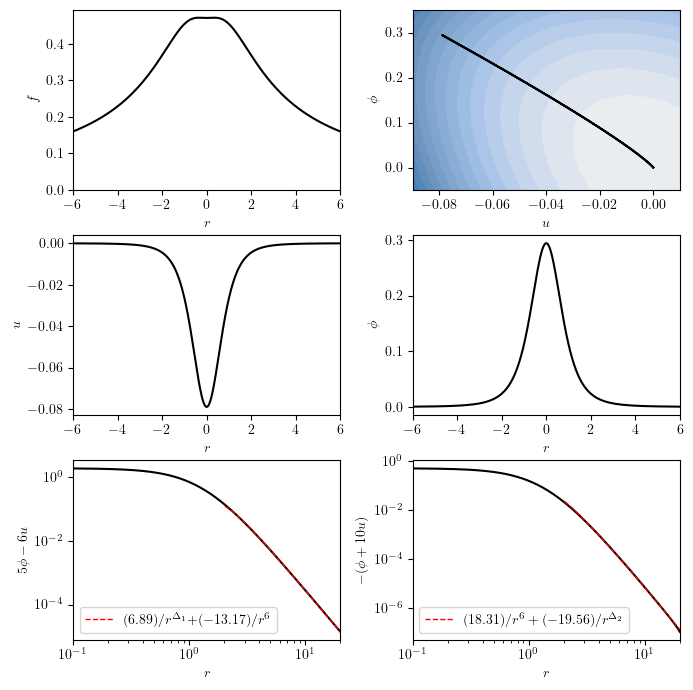

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(7,7))

q = wh.Q(r, q0)

xdata = [r, u, r, r, r, r]
ydata = [f, φ, u, φ, 5*φ-6*u, -(φ+10*u)]
xlabels = ['$r$', '$u$', '$r$', '$r$', '$r$', '$r$']
ylabels = ['$f$', '$\phi$', '$u$', '$\phi$', '$5\phi-6u$', '$-(\phi+10u)$']

# Plot grid of xy-data
for ax, xx, yy, xlab, ylab in zip(axes.ravel(), xdata, ydata, xlabels, ylabels):
    ax.plot(xx, yy, 'k')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

axes[0,0].set_ylim(0)

for ax in axes.ravel():
    ax.set_xlim(-6*q0, 6*q0)

# Superimpose potential in u-φ plot
u0s = np.linspace(-0.09, 0.01, 40)
φ0s = np.linspace(-0.05, 0.35, 40)
umesh, φmesh = np.meshgrid(u0s, φ0s)
VV = wh.V_S3S3(umesh, φmesh)

axes[0,1].contourf(umesh, φmesh, VV,
                   levels=np.arange(-6, -4.4, 0.1),
                   cmap=cc.cm['CET_L12'],
                   extent=(u0s[0], u0s[-1], φ0s[0], φ0s[-1])
                  )

axes[0,1].set_xlim(u0s[0], u0s[-1])
axes[0,1].set_ylim(φ0s[0], φ0s[-1])


# Plot expected power-law fall-offs in asymptotic region
rr, light, label_light = wh.fitLightMode_S3S3(r, u, φ, r>2)
axes[2,0].plot(rr, light, '--r', lw=1, label=label_light)

rr, heavy, label_heavy = wh.fitHeavyMode_S3S3(r, u, φ, r>2)
axes[2,1].plot(rr, heavy, '--r', lw=1, label=label_heavy)


for ax in axes[2]:
    ax.set_xlim(0.1*q0, rmax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
# plt.savefig('images/S3S3_profile_example.png', dpi=300)
plt.show()

## Type IIB on $T^{1,1}$

A shooting method is used to solve the equations of motion, which take the form (see Mathematica notebook)

$$ \begin{align*}
    f' &= F_f \,, & \qquad u' &\equiv u_d \,, & \qquad v' &\equiv u_v \,, & \qquad \phi' &\equiv \phi_d \,, & \qquad \chi' &\equiv \chi_d \,, & \qquad h' &= \frac{f}{q^4} \,,\\
    & & u_d' &= F_u \,, & v_d' &= F_v \,, & \phi_d' &= F_\phi \,, & \chi_d' &= F_\chi \,,
\end{align*} $$

with initial conditions at $r=0$,

$$ u_d(0) = v_d(0) = \phi_d(0) = \chi(0) = h(0) = 0 \,,\qquad f(0)=f_0 \,,\quad u(0)=u_0 \,,\quad \phi(0)=\phi_0 \,,\quad \chi'(0) = \chi_1 $$

chosen in such a way that the correct AdS boundary conditions are met for $r\to\infty$. For the solution to be smooth at $r=0$ the parameters need to be related through

$$ \begin{align*}
    f_0^{-2} &= 3 - \frac{q_0^2}{3} V(u_0, v_0) \,,\\
    \mathfrak{q}_2^2 &= e^{-4u_0+\phi_0} q_0^6 \left[6 + \left(6 - q_0^2(e^\phi \chi')_0^2 \right)f_0^{-2}\right] \,.
\end{align*} $$

(Note that we require $f_0^{-2}>0$.) For each fixed choice for $q_0$, $\phi_0$ and $\chi_1$ there is a unique choice for $(u_0,v_0)$ which leads to a regular AdS wormhole solution (provided $\chi_1$ is not too large). There is a residual $\mathrm{SL}(2,\mathbb{R})$ symmetry which allows one to shift $\phi$ and rescale $\chi,\mathfrak{q}_2$.

### Example profiles & shooting method

Picking $(u_0,v_0)$ by hand typically results in singular solutions.

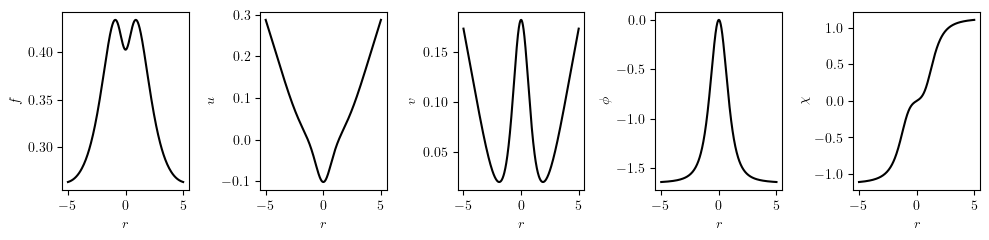

In [8]:
q0, rmax = 1, 5
u0, v0 = -0.102, 0.182
φ0 = 0
χ1 = 0.1

soln = wh.solve_T11(q0, u0, v0, φ0, χ1, rmax)
r, f, u, ud, v, vd, φ, φd, χ, χd, h, charge2 = wh.symmetrize_T11(soln)

fig, axes = plt.subplots(1, 5, figsize=(10,2.5))

for ax, y, label in zip(axes, [f, u, v, φ, χ], ['$f$', '$u$', '$v$', '$\phi$', '$\chi$']):
    ax.plot(r, y, 'k')
    ax.set_xlabel('$r$')
    ax.set_ylabel(label)

plt.tight_layout()
plt.show()

Optimal values for $(u_0,v_0)$ to match the AdS boundary conditions ($f\sim\frac{1}{r}$ and $u,v,\phi',\chi'\to0$ for $r\to\infty$) are found using a shooting method. An $\mathrm{SL}(2,\mathbb{R})$ is automatically applied to set $\phi(\infty)=0$: the chosen value of `χ1` corresponds to $(e^\phi \chi')_0$ (this combination is invariant under the post-rescaling).

In [11]:
q0 = 1
rmax = 10
χ1 = 0.1

soln, value = wh.wormhole_T11(q0, χ1, rmax, display_summary=True)
r, f, u, ud, v, vd, φ, φd, χ, χd, h, charge2 = soln

T11: (q0, χ1, rmax) = (1.000000, 0.100000, 10.000000)...
       success : True
        f_eval : 249
            u0 : -0.1028891470
            v0 : +0.1823857261
         value : 0


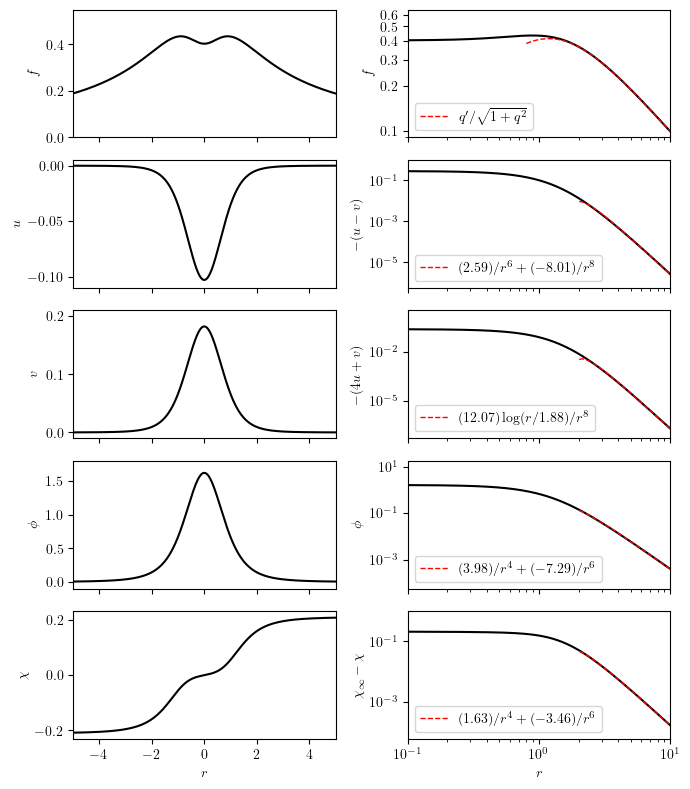

In [12]:
# Estimate χinf by fitting χ to a function of the form A + B/r^4 + C/r^6
mask = (r > rmax/1.5)
popt, pcov = curve_fit(wh.myMassless_T11, r[mask], χ[mask])
χinf = popt[0]


fig, axes = plt.subplots(5, 2, figsize=(7,8), sharex='col')

ydata = [f, f, u, -(u-v), v, -(4*u+v), φ, φ, χ, χinf-χ]
ylabels = ['$f$', '$f$', '$u$', '$-(u-v)$', '$v$', '$-(4u+v)$', '$\phi$', '$\phi$', '$\chi$', '$\chi_\infty - \chi$']

# Plot grid of xy-data
for ax, yy, ylab in zip(axes.ravel(), ydata, ylabels):
    ax.plot(r, yy, 'k')
    ax.set_ylabel(ylab)

axes[4,0].set_xlabel('$r$')
axes[4,1].set_xlabel('$r$')


# Plot expected power-law fall-offs in asymptotic region
rr = np.linspace(0.8, rmax, 1000)
q = wh.Q(rr, q0)
qd = wh.Qd(rr, q0)
axes[0,1].plot(rr, qd/np.sqrt(1+q**2), '--r', lw=1, label=r"$q'/\sqrt{1+q^2}$")

rr, light, label_light = wh.fitLightMode_T11(r, u, v, r>2)
axes[1,1].plot(rr, light, '--r', lw=1, label=label_light)

rr, heavy, label_heavy = wh.fitHeavyMode_T11(r, u, v, r>2)
axes[2,1].plot(rr, heavy, '--r', lw=1, label=label_heavy)

rr, φfit, label_φ = wh.fitMassless_T11(r, φ, r>2)
axes[3,1].plot(rr, φfit, '--r', lw=1, label=label_φ)

rr, χfit, label_χ = wh.fitMassless_T11(r, χinf-χ, r>2)
axes[4,1].plot(rr, χfit, '--r', lw=1, label=label_χ)

for ax in axes[:,1]:
    ax.set_yscale('log')
    ax.legend(loc='lower left')

axes[0,0].set_ylim(0, 0.55)
axes[1,0].set_ylim(-0.11)
axes[2,0].set_ylim(-0.01, 0.21)
axes[3,0].set_ylim(-0.1, 1.8)
axes[0,1].set_ylim(0.09, 0.65)
yticks = np.arange(0.1, 0.7, 0.1)
axes[0,1].set_yticks(yticks, labels=[r'${:.1f}$'.format(y) for y in yticks])
axes[1,1].set_ylim(10**-6.25, 1)
axes[2,1].set_ylim(10**-7.25, 10**0.5)
axes[3,1].set_ylim(10**-4.25, 10**1.25)
axes[4,1].set_ylim(10**-4.25, 1)

axes[3,0].set_xlim(-5*q0, 5*q0)
axes[3,1].set_xlim(0.1*q0, rmax)
axes[3,1].set_xscale('log')

for ax in axes[:, 1]:
    ax.minorticks_on()

plt.tight_layout()
# plt.subplots_adjust(left=0.11, right=0.98, top=0.99, bottom=0.08, wspace=0.3, hspace=0.13)
# plt.savefig('images/T11_profiles_ex1.png', dpi=300)
plt.show()